In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('income.csv', sep='\t')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [6]:
# to first get an idea of the data, we visualize it using scatter plot

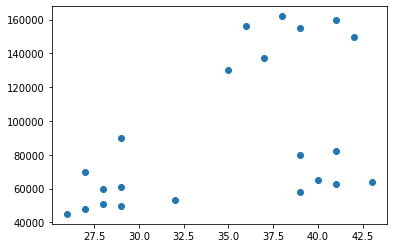

In [7]:
plt.scatter(df['Age'], df['Income($)'])

In [8]:
# you kinda see 3 clusters

In [12]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)                            # we need to specify the number of clusters (k)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [13]:
# this has successfully broken it into 3 clusters and given each of them a label 0, 1, 2

In [14]:
df['cluster'] = y_predicted              # add this column to our df

In [15]:
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


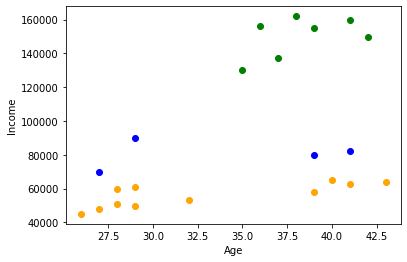

In [20]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

# now we have divided our data, we have 3 different dataframes each belonging to one cluster

plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='orange')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')

### there seems to be  a problem here, it did not cluster them correctly.
### This is because the x values range is around 20, and y values range is aorund 10,000. 
### Hence there is a scaling issue

## Hence we need to preprocess it by using minmaxscaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [22]:
scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']])

# this will scale the income and give eveyone income between 0 and 1

In [24]:
# we shall perform similiarly for age also

scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])

In [25]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [26]:
# Now both x and y are scaled to 0-1

In [30]:
# Now we should train our data set again with these scaled values!

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted
df['scaled_clusters'] = y_predicted
df

,Name,Age,Income($),cluster,scaled_clusters
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,1,0
3,Ismail,0.117647,0.128205,1,0
4,Kory,0.941176,0.897436,0,1
5,Gautam,0.764706,0.940171,0,1
6,David,0.882353,0.982906,0,1
7,Andrea,0.705882,1.000000,0,1
8,Brad,0.588235,0.948718,0,1
9,Angelina,0.529412,0.726496,0,1


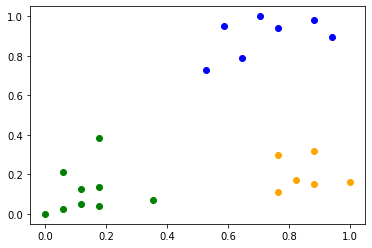

In [31]:
df0 = df[df['scaled_clusters']==0]
df1 = df[df['scaled_clusters']==1]
df2 = df[df['scaled_clusters']==2]

plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='blue')
plt.scatter(df2['Age'], df2['Income($)'], color='orange')

In [32]:
# km (KMeans) has an attribute for the centroidal centre

In [33]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [34]:
# we can plot this also on the same graph

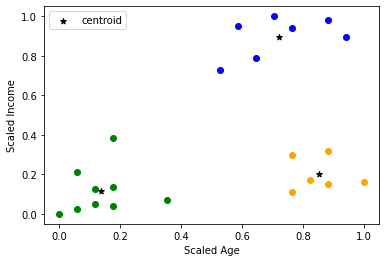

In [37]:
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')

plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='blue')
plt.scatter(df2['Age'], df2['Income($)'], color='orange')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='centroid')

plt.legend()

### The dataset here was small, and hence easy for us to visualize what 'k' value (here 3) should be taken
### We can use elbow method to get the k value

In [38]:
k_range = range(1, 10)
sse = []                # this array stores Sum of Squares Error

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)                         # this gives the sum of squares error

In [39]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.21066678488010523,
 0.17462386586687895,
 0.13265419827245162,
 0.10188787724979426]

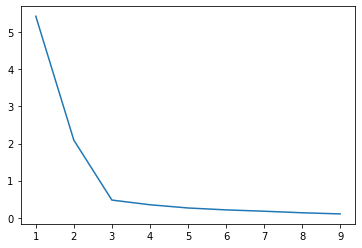

In [40]:
plt.plot(k_range, sse)

In [41]:
# From this we can easily see the elbow to be k = 3

# Exercise


In [42]:
# Use petal length and width features to form clusters

In [43]:
from sklearn.datasets import load_iris

In [55]:
iris = load_iris()

In [56]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [57]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [59]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [60]:
df.drop(columns=['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)


In [61]:
df


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


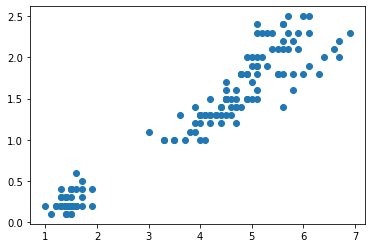

In [62]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [64]:
df.rename(columns={'petal length (cm)': 'length', 'petal width (cm)':'width'}, inplace=True)

In [65]:
df

,length,width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [66]:
# first lets do elbow method to confirm about how many 'k' clusters we need

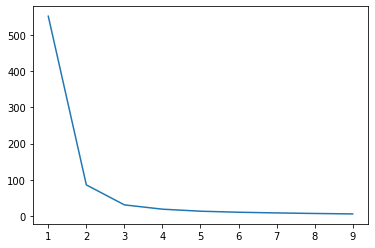

In [67]:
k_range = range(1, 10)
sse = []                

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['length', 'width']])
    sse.append(km.inertia_)                         
    
plt.plot(k_range, sse)

In [68]:
# elbow is at 2

In [69]:
km = KMeans(n_clusters=2)
y_predict = km.fit_predict(df)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [70]:
df['cluster'] = y_predict

In [71]:
df

,length,width,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


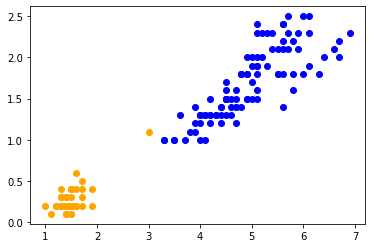

In [73]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]

plt.scatter(df0.length, df0.width, color='orange')
plt.scatter(df1.length, df1.width, color='blue')

In [74]:
# We have to still scale it

In [75]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['width']])
df[['width']] = scaler.transform(df[['width']])

In [76]:
scaler.fit(df[['length']])
df[['length']] = scaler.transform(df[['length']])

In [77]:
df

,length,width,cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


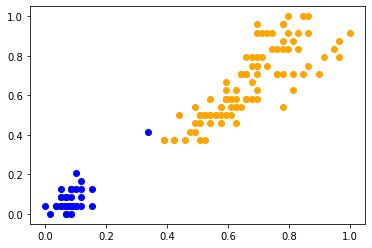

In [78]:
km = KMeans(n_clusters=2)
y_predict = km.fit_predict(df)
y_predict

df['cluster'] = y_predict

df0 = df[df.cluster==0]
df1 = df[df.cluster==1]

plt.scatter(df0.length, df0.width, color='orange')
plt.scatter(df1.length, df1.width, color='blue')

In [ ]:
# Result after scaling